# An Introduction to Intrusion Detection Using Machine Learning and Python

In [108]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [93]:
dataset = pd.read_csv("IDS Dataset.csv")

## Functions 

In [94]:
# Check for missing values
def chekMissingVal(dataSet):
    colsIsEmpty = dataSet.isnull().sum()
    colsIsEmpty = colsIsEmpty.to_frame(name="Features & Missing Values")
    return colsIsEmpty

def toNumeric(dataset,cols_list):
    for col in cols_list:
        col_name = col
        col   = LabelEncoder()
        dataset[col_name] = col.fit_transform(dataset[col_name])
        #return dataset
        
def isBalanced(target,dataSet):
    counter = Counter(target)
    print("The dataset contains {} records of class Attack which means {} %".format(counter[0],np.round((counter[0]/(counter[0] + counter[1]))*100,2)))
    print("The dataset contains {} records of class Normal which means {} %".format(counter[1],np.round((counter[1]/(counter[0]+counter[1]))*100,2)))
    plt.barh(['Attack','Normal'],[counter[0],counter[1]],color=['red','grey'])

In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [96]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [97]:
chekMissingVal(dataset)

,Features & Missing Values
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [98]:
toNumeric(dataset,['class','protocol_type','service','flag'])

In [99]:
dataset.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,0,1,46,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
6,0,1,46,5,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0,1,46,5,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0,1,48,5,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0,1,46,5,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [100]:
# 1= Normal
# 0=attack

In [101]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int32  
 2   service                      25192 non-null  int32  
 3   flag                         25192 non-null  int32  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [102]:
ids_dataset = dataset

In [103]:
target = ids_dataset['class']

In [104]:
target

0        1
1        1
2        0
3        1
4        1
        ..
25187    0
25188    0
25189    0
25190    0
25191    0
Name: class, Length: 25192, dtype: int32

In [105]:
ids_dataset.drop('class',axis='columns',inplace=True)

In [106]:
ids_dataset

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


The dataset contains 11743 records of class Attack which means 46.61 %
The dataset contains 13449 records of class Normal which means 53.39 %


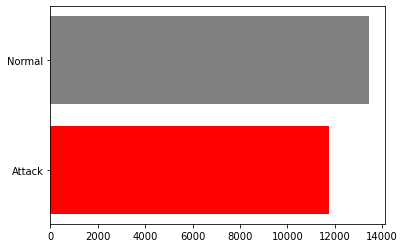

In [107]:
isBalanced(target,ids_dataset)

In [109]:
ids_dataset_std = StandardScaler().fit_transform(ids_dataset)

In [110]:
ids_dataset_std

array([[-0.11355066, -0.12606067, -0.64538418, ..., -0.62736475,
        -0.22166806, -0.37428075],
       [-0.11355066,  2.21591606,  0.76892549, ..., -0.62736475,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.12606067,  1.09035951, ...,  1.61445359,
        -0.38513984, -0.37428075],
       ...,
       [-0.11355066, -0.12606067,  1.09035951, ..., -0.62736475,
         2.88429591,  2.77704096],
       [-0.11355066, -0.12606067,  0.57606508, ...,  1.61445359,
        -0.38513984, -0.37428075],
       [-0.11355066, -0.12606067, -0.77395779, ...,  1.61445359,
        -0.38513984, -0.37428075]])

In [111]:
ids_train_std, ids_test_std, ids_train_target, ids_test_target = train_test_split(ids_dataset_std, target,test_size = 0.30)

In [112]:
# fit the model with data
tree_clf = DecisionTreeClassifier().fit(ids_train_std,ids_train_target)

#fit the model with the testing data
prd = tree_clf.predict(ids_test_std)

# Generating the model report
print(classification_report(prd,ids_test_target))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3573
           1       1.00      1.00      1.00      3985

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



In [116]:
# Splitting  the dataset First

ids_train, ids_test, ids_train_target, ids_test_target = train_test_split(ids_dataset, target,test_size = 0.30)

# Normalazing Each part
ids_train_std = StandardScaler().fit_transform(ids_train)
ids_test_std = StandardScaler().fit_transform(ids_test)

In [117]:
# fit the model with data
tree_clf = DecisionTreeClassifier().fit(ids_train_std,ids_train_target)

#fit the model with the testing data
prd = tree_clf.predict(ids_test_std)

# Generating the model report
print(classification_report(prd,ids_test_target))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      3967
           1       0.87      0.98      0.92      3591

    accuracy                           0.92      7558
   macro avg       0.93      0.93      0.92      7558
weighted avg       0.93      0.92      0.92      7558



In [132]:
def getImportance(features_names,importance):
    importances = pd.DataFrame({'feature':features_names,'importance':np.round(importance,3)})
    importances = importances.sort_values('importance',ascending=False)
    return importances

def selectBestFeatures(dataset,importances,threshold):
    features_selected = dataset
    cols = dataset.columns
    i=0
    count_sel_f=0
    toBeDroped = []
    Feautre  =  []
    Ranking   = []
    for col in cols:
    
        if  importances['importance'][i]<=threshold:
            count_sel_f=count_sel_f+1
            Feautre.append(col)
            Ranking.append(importances['importance'][i])
        else:
            toBeDroped.append(col)
        i=i+1
    features_selected = dataset.drop(toBeDroped,axis='columns')
    print("the Number of selected features is : ",count_sel_f)
    return [features_selected,Feautre,Ranking]



In [134]:
# Calacuting Gini impurity for all features using ITMO_FS Library
from ITMO_FS.filters.univariate import gini_index
x=ids_dataset.to_numpy()
y=target.to_numpy()
scores=getImportance(ids_dataset.columns,gini_index(x, y))
scores

,feature,importance
8,urgent,0.752
4,src_bytes,0.584
15,num_root,0.287
12,num_compromised,0.286
17,num_shells,0.236
16,num_file_creations,0.162
6,land,0.154
14,su_attempted,0.114
18,num_access_files,0.049
19,is_guest_login,0.032


In [135]:
selected_features = selectBestFeatures(ids_dataset,scores,0.003)
ids_data_2 = selected_features[0]
ids_data_2

the Number of selected features is :  11


,protocol_type,flag,logged_in,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,9,0,0.0,1.00,0.00,25,0.17,0.03,0.05,0.00
1,2,9,0,0.0,0.08,0.15,1,0.00,0.60,0.00,0.00
2,1,5,0,0.0,0.05,0.07,26,0.10,0.05,0.00,0.00
3,1,9,1,0.0,1.00,0.00,255,1.00,0.00,0.00,0.01
4,1,9,1,0.0,1.00,0.00,255,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
25187,1,2,0,1.0,0.07,0.07,7,0.03,0.06,1.00,1.00
25188,1,9,1,0.0,1.00,0.00,39,1.00,0.00,0.00,0.00
25189,1,1,0,1.0,0.07,0.07,13,0.05,0.07,1.00,1.00
25190,1,5,0,0.0,0.14,0.06,20,0.08,0.06,0.00,0.00


In [136]:
# Standarizing the dataset 
ids_train, ids_test, ids_train_target, ids_test_target = train_test_split(ids_data_2, target,test_size = 0.30)
ids_train_std = StandardScaler().fit_transform(ids_train)
ids_test_std = StandardScaler().fit_transform(ids_test)

# fit the model with data
tree_clf = DecisionTreeClassifier().fit(ids_train_std,ids_train_target)
#fit the model with the testing data
prd = tree_clf.predict(ids_test_std)

# Generating the model report
print(classification_report(prd,ids_test_target))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3544
           1       0.98      0.98      0.98      4014

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

